# Scraping `zangia.mn`
* You need to import `pandas`, `requests` and `BeautifulSoup`

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

### Exercise 1: Scrape `zangia.mn` page#1
* Make a dataframe using `Мэдээлэл технологи, Харилцаа холбоо` category `https://www.zangia.mn/job/list/pg.1/b.4`.
* Get job listings from page 1.
  * DataFrame should include columns: `job_title`, `salary`. 
  * Remove the row if `salary` text contains `Тохиролцоно`. 
    * *Hint*: Loop over the df and use `in` and `drop` methods.
  * Take salary as 5000000 if `salary` text contains `5,000,000 -ааc дээш`
  * Import statistics library
  * Get the median salary using statistics library if there is a salary range. Example: 2,500,000-3,500,000 should be 3000000. 
    * Use string replace method to remove comma from numbers.
    * *Hint*: Use string split method to get the numbers. 
  * Make a histogram plot using the `salary`.  


In [2]:
response = requests.get("https://www.zangia.mn/job/list/pg.1/b.4")
soup = BeautifulSoup(response.content)



In [3]:
divs = soup.find_all("div", {"class": "ad"})

In [22]:
divs[0].b.get_text(strip=True)

'ERP систем хөгжүүлэгч / Програмист'

In [11]:
divs[0].span.get_text(strip=True)

'2,500,000 - 3,000,000'

In [12]:
job_titles = []
job_salaries = []
for div in divs:
    job_titles.append(div.b.get_text(strip=True))
    job_salaries.append(div.span.get_text(strip=True))

In [59]:
df = pd.DataFrame({"title": job_titles, "salary": job_salaries})

In [60]:
for i in range(len(df)):
    if "5,000,000 -ааc дээш" in df['salary'][i]:
        df['salary'][i] = 5_000_000
        
    if "Тохиролцоно" in df['salary'][i]:
        df.drop(i, inplace=True)    

In [61]:
df = df.reset_index(drop=True)
df['salary'] = df['salary'].str.replace(",", "")

In [62]:
import statistics

for i in range(len(df)):
    lower = int(df['salary'][i].split(" - ")[0])
    upper = int(df['salary'][i].split(" - ")[1])
    # df['salary'][i] = statistics.median([lower, upper])
    df.loc['salary', i] = statistics.median([lower, upper])

<Axes: >

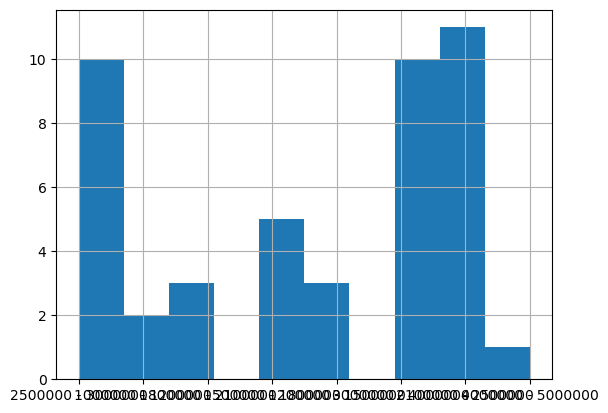

In [63]:
df['salary'].hist()

### Exercise 2: Scrape `zangia.mn` Page#1 - Page#10
* Make a dataframe using `Мэдээлэл технологи, Харилцаа холбоо` category `https://www.zangia.mn/job/list/pg.1/b.4`.
* Get job listings from page 1-10. *Hint* Loop over the list of pages
* Make a dataframe and make a histogram plot using `salary` column.

In [ ]:
# Your code

### Exercise 3: Scrape `zangia.mn` Page#1 - Page#7
* Make a dataframe using `Захиргаа, Хүний нөөц` category `https://www.zangia.mn/job/list/pg.1/b.36`.
* Get job listings from page 1-7.
* Make a dataframe and make a histogram plot using `salary` column.

**WARNING** MAKE SURE YOUR LINKS ARE CORRECT!

In [ ]:
# Your code